In [1]:
import os
import numpy as np
from numpy import sqrt, mean, absolute
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

print("Successful Import")

Successful Import


In [2]:
os.chdir('<Insert PATH Here>')

df = pd.read_csv(r'NYC REAL ESTATE/nyc_full_clean_nocovid.csv')
df

,BORO,ZIP CODE,LAND SQFT,GROSS SQFT,YEAR BUILT,WEEK #,SEASON,SALE PRICE
0,2,10453,3723,2280,1920,1,2,240000.0
1,4,11367,1800,1260,1950,1,2,10.0
2,5,10312,2280,1440,1980,1,2,380250.0
3,4,11422,1470,1520,1996,1,2,425000.0
4,3,11236,2000,832,1930,1,2,491000.0
...,...,...,...,...,...,...,...,...
4381,2,10451,2535,1728,1899,44,1,470000.0
4382,5,10306,1100,1485,1989,44,1,494400.0
4383,2,10466,1710,1152,1940,44,1,535600.0
4384,4,11367,1800,1332,1950,44,1,10.0


<Axes: >

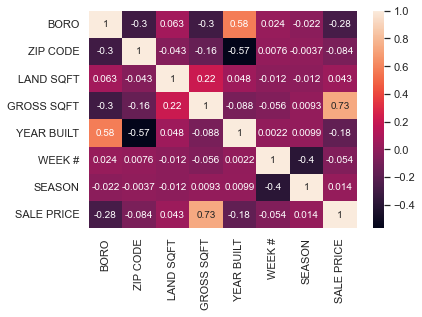

In [3]:
corr_matrix = df.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, annot=True)

# Split Data

In [4]:
learn_vars = ['BORO', 'ZIP CODE', 'LAND SQFT','GROSS SQFT', 'YEAR BUILT', 'WEEK #', 'SEASON'] 

In [5]:
X = df[learn_vars]
y = df['SALE PRICE']
print(X.shape, y.shape, '\n')

(4386, 7) (4386,) 



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape ,'\n')
print(X_test.shape, y_test.shape ,'\n')

(3508, 7) (3508,) 

(878, 7) (878,) 



In [7]:
scaler = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

y_train_s = np.array(y_train).reshape(-1,1)
y_train_s = scaler.fit_transform(y_train_s)
y_train_s = y_train_s.flatten()

y_test_s = np.array(y_test).reshape(-1,1)
y_test_s = scaler.transform(y_test_s)
y_test_s = y_test_s.flatten()

In [8]:
print(X_train_s.shape, y_train_s.shape ,'\n')
print(X_test_s.shape, y_test_s.shape ,'\n')

(3508, 7) (3508,) 

(878, 7) (878,) 



In [9]:
lr = LinearRegression()
model_lr = lr.fit(X_train_s, y_train_s)

# Prediction
Y_pred_s = model_lr.predict(X_test_s)

print('========== LR Results Evaluation ==========')
mae_s = metrics.mean_absolute_error(y_test_s, Y_pred_s)
print('MAE:', mae_s)
mse_s = metrics.mean_squared_error(y_test_s, Y_pred_s)
print('MSE:', mse_s)
print('RMSE:', np.sqrt(mse_s))
r2_s = metrics.r2_score(y_test_s, Y_pred_s)
print('R-Squared Score: ', r2_s)
print('===========================================')

========== LR Results Evaluation ==========
MAE: 0.007605434191040616
MSE: 0.00014155072966593718
RMSE: 0.011897509389193067
R-Squared Score:  0.5930022888812814


In [10]:
# with k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(model_lr, X_train_s, y_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_lr, X_train_s, y_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== LR Results Evaluation (with Cross Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y_test_s, Y_pred_s)
print('R-Squared Score: ', "{:.4f}".format(r2_s))
print('====================================================================')

========== LR Results Evaluation (with Cross Validation) ==========
MAE: 0.0082
RMSE: 0.0175
R-Squared Score:  0.5930


Text(0.5, 1.0, 'Actual vs Predicted Sale Values (Linear Regression)')

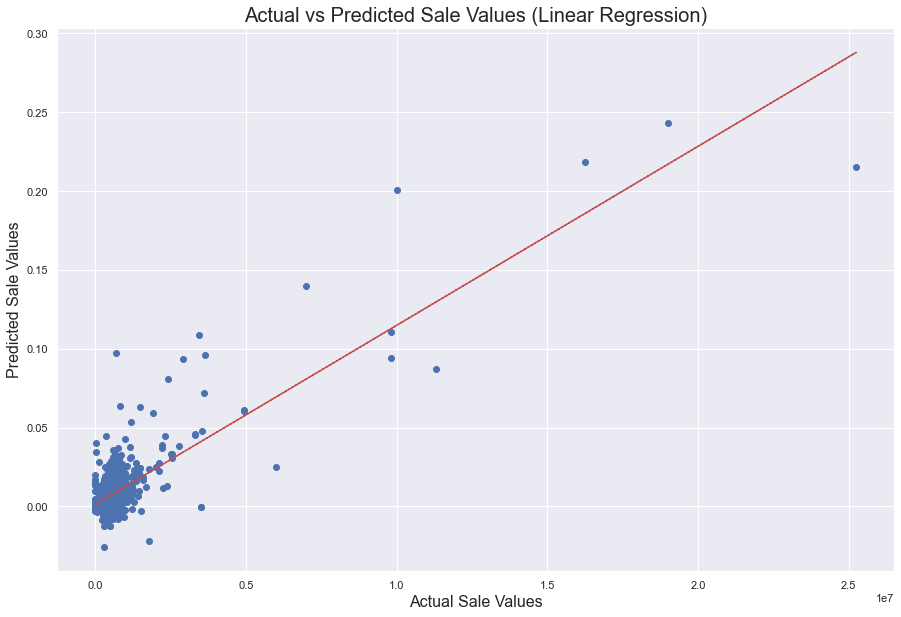

In [11]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,Y_pred_s)
m, b = np.polyfit(y_test, Y_pred_s, 1)
plt.plot(y_test, m*y_test + b, "r--")
plt.xlabel('Actual Sale Values', fontsize = 16)
plt.ylabel('Predicted Sale Values', fontsize = 16)
plt.title('Actual vs Predicted Sale Values (Linear Regression)', fontsize = 20)

## Random Forest

In [12]:
rf = RandomForestRegressor(random_state = 42)
model_rf = rf.fit(X_train_s, y_train_s)

# Prediction
Y_pred_rf = model_rf.predict(X_test_s)

print('========== RFR Results Evaluation ==========')
mae_rf = metrics.mean_absolute_error(y_test_s, Y_pred_rf)
print('MAE:', mae_rf)
mse_rf = metrics.mean_squared_error(y_test_s, Y_pred_rf)
print('MSE:', mse_rf)
print('RMSE:', np.sqrt(mse_rf))
r2_rf = metrics.r2_score(y_test_s, Y_pred_rf)
print('R-Squared Score: ', r2_rf)
print('=============================================')


========== RFR Results Evaluation ==========
MAE: 0.0030053902487091285
MSE: 0.00010515453889265003
RMSE: 0.01025448871922194
R-Squared Score:  0.6976514586392013


In [13]:
# k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(model_rf, X_train_s, y_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_rf, X_train_s, y_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== LR Results Evaluation (with Cross Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y_test_s, Y_pred_rf)
print('R-Squared Score: ', "{:.4f}".format(r2_s))
print('===================================================================')

========== LR Results Evaluation (with Cross Validation) ==========
MAE: 0.0030
RMSE: 0.0152
R-Squared Score:  0.6977


## SVR

In [14]:
supp_vec = SVR(kernel = "poly")
svrModel = supp_vec.fit(X_train_s, y_train_s)
Y_pred_svr = svrModel.predict(X_test_s)

print('========== SVR Results Evaluation ==========')
mae_svr = metrics.mean_absolute_error(y_test_s, Y_pred_svr)
print('MAE:', mae_svr)
mse_svr = metrics.mean_squared_error(y_test_s, Y_pred_svr)
print('MSE:', mse_svr)
print('RMSE:', np.sqrt(mse_svr))
r2_svr = metrics.r2_score(y_test_s, Y_pred_svr)
print('R-Squared Score: ', r2_svr)
print('============================================')

========== SVR Results Evaluation ==========
MAE: 0.03538735125039711
MSE: 0.001820426549954853
RMSE: 0.042666456965101435
R-Squared Score:  -4.234232566938606


In [15]:
# k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(svrModel, X_train_s, y_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(svrModel, X_train_s, y_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== SVR Results Evaluation (with Cross Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y_test_s, Y_pred_svr)
print('R-Squared Score: ', "{:.4f}".format(r2_s))
print('====================================================================')

========== SVR Results Evaluation (with Cross Validation) ==========
MAE: 0.0404
RMSE: 0.0493
R-Squared Score:  -4.2342


## GBR

In [16]:
gbr = GradientBoostingRegressor()

gbrModel = gbr.fit(X_train_s, y_train_s)
Y_pred_gbr = gbrModel.predict(X_test_s)

print('========== GBR Results Evaluation ==========')
mae_gbr = metrics.mean_absolute_error(y_test_s, Y_pred_gbr)
print('MAE:', mae_gbr)
mse_gbr = metrics.mean_squared_error(y_test_s, Y_pred_gbr)
print('MSE:', mse_gbr)
print('RMSE:', np.sqrt(mse_gbr))
r2_gbr = metrics.r2_score(y_test_s, Y_pred_gbr)
print('R-Squared Score: ', r2_gbr)
print('============================================')

========== GBR Results Evaluation ==========
MAE: 0.0030764471294755912
MSE: 0.00010699223271575047
RMSE: 0.010343704980119574
R-Squared Score:  0.6923675778601757


In [17]:
# k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(gbrModel, X_train_s, y_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(gbrModel, X_train_s, y_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== GBR Results Evaluation (with Cross Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y_test_s, Y_pred_gbr)
print('R-Squared Score: ', "{:.4f}".format(r2_s))
print('====================================================================')

========== GBR Results Evaluation (with Cross Validation) ==========
MAE: 0.0032
RMSE: 0.0166
R-Squared Score:  0.6924


# Feature Selection

In [18]:
from scipy.stats import pointbiserialr, spearmanr
col_names = df.columns
params = []
correlation = []
abs_correlation = []
for col in col_names:
    if col != "SALE PRICE":
        if len(df[col].unique()) <= 2:
            corr = spearmanr(df['SALE PRICE'], df[col])[0]
        else:
            corr = pointbiserialr(df['SALE PRICE'], df[col])[0]
        params.append(col)
        correlation.append(corr)
        abs_correlation.append(abs(corr))
params_df = pd.DataFrame({'correlation':correlation, 'parameter': params, 'abs_correlation': abs_correlation})
params_df = params_df.sort_values(by = ['abs_correlation'], ascending = False)
params_df = params_df.set_index('parameter')
params_df

,correlation,abs_correlation
parameter,,
GROSS SQFT,0.733026,0.733026
BORO,-0.280299,0.280299
YEAR BUILT,-0.176666,0.176666
ZIP CODE,-0.084066,0.084066
WEEK #,-0.054245,0.054245
LAND SQFT,0.043493,0.043493
SEASON,0.014239,0.014239


In [19]:
best_feats = params_df.index[0:4].values
print('Top features:\t', best_feats)

Top features:	 ['GROSS SQFT' 'BORO' 'YEAR BUILT' 'ZIP CODE']


In [20]:
learn_vars_featselect = ['GROSS SQFT', 'BORO', 'YEAR BUILT', 'ZIP CODE']
X2 = df[learn_vars_featselect]
y2 = df['SALE PRICE']
print(X2.shape, y2.shape, '\n')

(4386, 4) (4386,) 



In [21]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
print(X2_train.shape, y2_train.shape ,'\n')
print(X2_test.shape, y2_test.shape ,'\n')

(3508, 4) (3508,) 

(878, 4) (878,) 



In [22]:
X2_train_s = scaler.fit_transform(X2_train)
X2_test_s = scaler.transform(X2_test)

y2_train_s = np.array(y2_train).reshape(-1,1)
y2_train_s = scaler.fit_transform(y2_train_s)
y2_train_s = y2_train_s.flatten()


y2_test_s = np.array(y2_test).reshape(-1,1)
y2_test_s = scaler.transform(y2_test_s)
y2_test_s = y2_test_s.flatten()

print(X2_train_s.shape, y2_train_s.shape ,'\n')
print(X2_test_s.shape, y2_test_s.shape ,'\n')

(3508, 4) (3508,) 

(878, 4) (878,) 



## Linear Regression (with Feature Selection)

In [23]:
model_lr_2 = model_lr.fit(X2_train_s, y2_train)

# Prediction
Y2_pred_s = model_lr_2.predict(X2_test_s)

print('========== LR Results Evaluation With Feature Selection ==========')
mae_s_2 = metrics.mean_absolute_error(y2_test, Y2_pred_s)
print('MAE:', mae_s_2)
mse_s_2 = metrics.mean_squared_error(y2_test, Y2_pred_s)
print('MSE:', mse_s_2)
print('RMSE:', np.sqrt(mse_s_2))
r2_s_2 = metrics.r2_score(y2_test, Y2_pred_s)
print('R-Squared Score: ', r2_s_2)
print('==================================================================')

========== LR Results Evaluation With Feature Selection ==========
MAE: 574437.9799663099
MSE: 840644323932.3143
RMSE: 916866.5791336896
R-Squared Score:  0.5933850010787783


In [24]:
# k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(model_lr_2, X2_train_s, y2_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_lr_2, X2_train_s, y2_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== LR Results Evaluation (with Feature Selection and Cross Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y2_test_s, Y2_pred_s)
print('R-Squared Score: ', "{:.4f}".format(r2_s))
print('=========================================================================================')

========== LR Results Evaluation (with Feature Selection and Cross Validation) ==========
MAE: 0.0080
RMSE: 0.0177
R-Squared Score:  -8296268042431592.0000


## Random Forest (with Feature Selection)

In [25]:
rf = RandomForestRegressor(random_state = 42)
model_rf_2 = rf.fit(X2_train_s, y2_train_s)

# Prediction
Y2_pred_rf = model_rf_2.predict(X2_test_s)

print('========== RFR Results Evaluation (with feature selection) ==========')
mae_rf = metrics.mean_absolute_error(y2_test_s, Y2_pred_rf)
print('MAE:', mae_rf)
mse_rf = metrics.mean_squared_error(y2_test_s, Y2_pred_rf)
print('MSE:', mse_rf)
print('RMSE:', np.sqrt(mse_rf))
r2_rf = metrics.r2_score(y2_test_s, Y2_pred_rf)
print('R-Squared Score: ', r2_rf)
print('====================================================================')


========== RFR Results Evaluation (with feature selection) ==========
MAE: 0.002882694652993065
MSE: 8.855306162671941e-05
RMSE: 0.00941026363215821
R-Squared Score:  0.7453853224233676


In [26]:
# k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(model_rf_2, X2_train_s, y2_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_rf_2, X2_train_s, y2_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== LR Results Evaluation (with feature selection) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y2_test_s, Y2_pred_rf)
print('R-Squared Score: ', "{:.4f}".format(r2_s))
print('====================================================================')

========== LR Results Evaluation (with feature selection) ==========
MAE: 0.0031
RMSE: 0.0154
R-Squared Score:  0.7454


## SVR (with Feature Selection)

In [27]:
supp_vec = SVR(kernel = "poly")
svrModel2 = supp_vec.fit(X2_train_s, y2_train_s)
Y2_pred_svr = svrModel2.predict(X2_test_s)

print('========== SVR Results Evaluation ==========')
mae_svr = metrics.mean_absolute_error(y2_test_s, Y2_pred_svr)
print('MAE:', mae_svr)
mse_svr = metrics.mean_squared_error(y2_test_s, Y2_pred_svr)
print('MSE:', mse_svr)
print('RMSE:', np.sqrt(mse_svr))
r2_svr = metrics.r2_score(y2_test_s, Y2_pred_svr)
print('R-Squared Score: ', r2_svr)
print('============================================')

========== SVR Results Evaluation ==========
MAE: 0.037758867824425786
MSE: 0.0018633442018872951
RMSE: 0.04316647080648701
R-Squared Score:  -4.357632751058584


In [28]:
# k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(svrModel2, X2_train_s, y2_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(svrModel2, X2_train_s, y2_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== SVR Results Evaluation (with Cross Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y2_test_s, Y2_pred_svr)
print('R-Squared Score: ', "{:.4f}".format(r2_s))
print('====================================================================')

========== SVR Results Evaluation (with Cross Validation) ==========
MAE: 0.0417
RMSE: 0.0486
R-Squared Score:  -4.3576


## GBR (with Feature Selection)

In [29]:
gbr = GradientBoostingRegressor()

gbrModel2 = gbr.fit(X_train_s, y_train_s)
Y2_pred_gbr = gbrModel2.predict(X_test_s)

print('========== GBR Results Evaluation ==========')
mae_gbr = metrics.mean_absolute_error(y2_test_s, Y2_pred_gbr)
print('MAE:', mae_gbr)
mse_gbr = metrics.mean_squared_error(y2_test_s, Y2_pred_gbr)
print('MSE:', mse_gbr)
print('RMSE:', np.sqrt(mse_gbr))
r2_gbr = metrics.r2_score(y2_test_s, Y2_pred_gbr)
print('R-Squared Score: ', r2_gbr)
print('============================================')

========== GBR Results Evaluation ==========
MAE: 0.00308417113563262
MSE: 0.00010607408700785445
RMSE: 0.010299227495684056
R-Squared Score:  0.6950075020941875


In [30]:
# k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(gbrModel2, X2_train_s, y2_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(gbrModel2, X2_train_s, y2_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== GBR Results Evaluation (with Cross Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y2_test_s, Y2_pred_gbr)
print('R-Squared Score: ', "{:.4f}".format(r2_s))
print('====================================================================')

========== GBR Results Evaluation (with Cross Validation) ==========
MAE: 0.0033
RMSE: 0.0160
R-Squared Score:  0.6950


In [31]:
sampleTestdfX = X2_test[:5]
sampleTestdfX

,GROSS SQFT,BORO,YEAR BUILT,ZIP CODE
2776,1748,5,2018,10306
3022,1048,2,1940,10469
2606,1152,5,1986,10312
912,1068,5,1988,10306
877,1638,1,1899,10014


In [32]:
sampleTestdf_vals = y2_test[:5]
sampleTestdf_vals

2776     748414.0
3022     270000.0
2606     375000.0
912      320000.0
877     6000000.0
Name: SALE PRICE, dtype: float64

In [33]:
model_rf_3 = rf.fit(X2_train, y2_train)
sampleRFpred_rf = model_rf_3.predict(sampleTestdfX)
sampleRFpred_rf

array([ 724532.39166667,  403390.85      ,  298197.38804762,
        359344.38833333, 7388619.        ])

In [34]:
gbrModel3 = gbr.fit(X2_train, y2_train)
sampleRFpred_gbr = gbrModel3.predict(sampleTestdfX)
sampleRFpred_gbr

array([ 562389.35558386,  462837.06065068,  421981.13733533,
        407758.43310489, 7244720.6408143 ])

In [35]:
sampleRFpred_rf = model_rf_3.predict(X2_test)
sampleRFpred_rf

array([  724532.39166667,   403390.85      ,   298197.38804762,
         359344.38833333,  7388619.        ,   815132.57      ,
         350265.2384127 ,   465075.75      ,   414878.71904762,
         500833.17611111,   624927.68      ,   632886.02166667,
        3081210.5       ,   475910.89      ,   735501.54666667,
         344693.62666667,   845040.        ,   586188.04      ,
         429863.86428571,   491140.8       ,   660511.49966667,
         394213.62545238,   656034.20333333,   426891.77547619,
        1129186.88      ,   399561.88761905,   393203.9       ,
         423274.83333333,   744146.02333333,   523192.5       ,
        1061407.75714286,   338906.04219841,   493831.        ,
         573033.70666667,   856490.2       ,   453990.91066667,
         319711.1595    ,   577125.08666667,   363649.5       ,
         392820.33166667,   494532.14285714,   865640.        ,
         576869.61619048,   658474.40666667,   520853.36      ,
         500431.29857143,   241722.94   